<a href="https://colab.research.google.com/github/vasukondreddy/PyTorch/blob/main/5_ANN_Fashion_MINST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt



In [ ]:
# set random for reproducibility
torch.manual_seed(42)

In [ ]:
df=pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


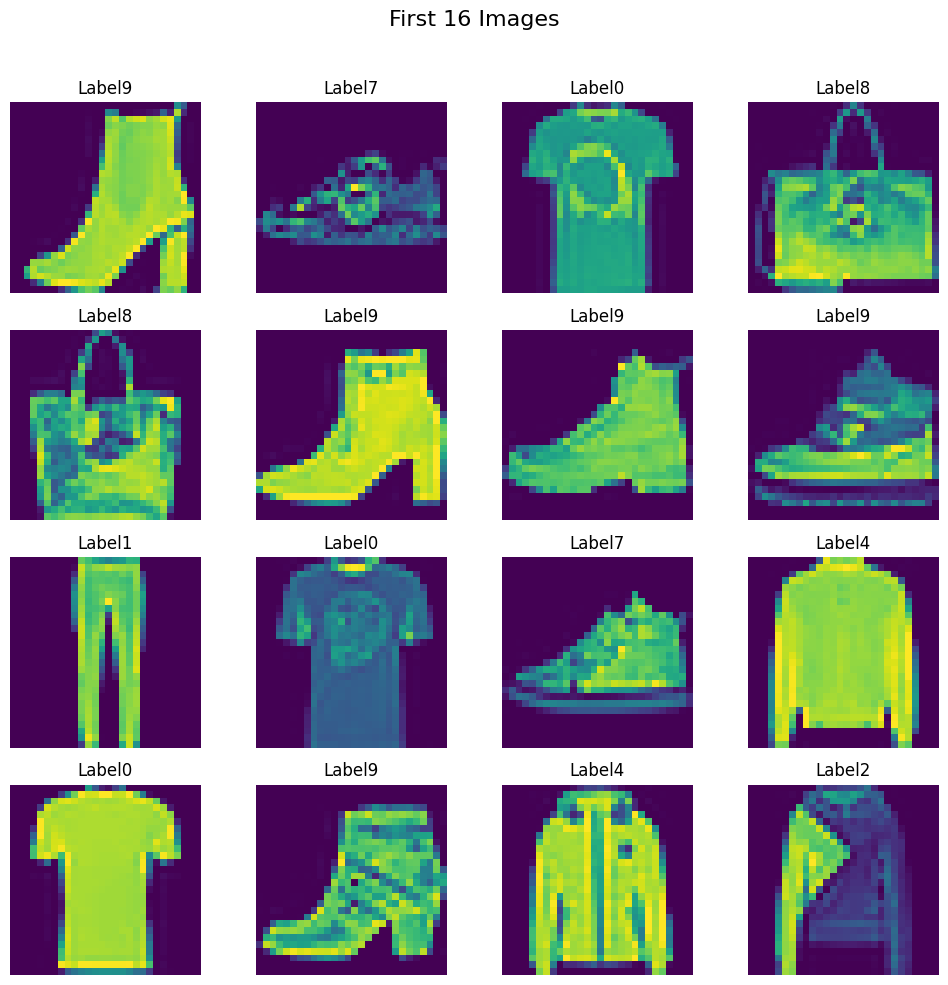

In [ ]:
# create a 4x4 grid of images

fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("First 16 Images",fontsize=16)

# plot the first 16 images from the dataset

for i, ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28) # reshape to 28x28
  ax.imshow(img) # Display in grayscale
  ax.axis('off') # remove axis for a cleaner look
  ax.set_title(f"Label{df.iloc[i,0]}") # show the label

plt.tight_layout(rect=[0,0,1,0.96]) # adjust layout to fit the title
plt.show()

In [ ]:
# train test split
X=df.iloc[:,1:].values
y=df.iloc[:,0].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# scaling teh features
X_train=X_train/255.0 # 255 is the max value in the data set
# we have different values in dset so, converting in range 0-1 for better use
X_test=X_test/255.0


In [ ]:
X_train

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
        0.       ]])

In [ ]:
# crate CustomData class
class CustomDataset(Dataset):

  def __init__(self,features,labels):

    self.features=torch.tensor(features, dtype=torch.float32) # we will se features in float
    self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,index):
    return self.features[index],self.labels[index]



In [ ]:
# create train_dataset object

train_dataset=CustomDataset(X_train,y_train)

In [ ]:
len(train_dataset)

4800

In [ ]:
train_dataset[0] # train dataset first label

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [ ]:
# create test_dataset object

test_dataset=CustomDataset(X_test,y_test)

In [ ]:
# create train and test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader= DataLoader(test_dataset,batch_size=32,shuffle=False)

In [ ]:
# define NN Class

class MyNN(nn.Module):

  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),# from input data filtering 128 features to next layer ReLu(hidden layer 1)
        nn.ReLU(),
        nn.Linear(128,64), # from 128 filtering 64 to next hidden layer
        nn.ReLU(),
        nn.Linear(64,10) # from 64 featues filtering 10 features giving as output
    )
 # in pytorch internally entropy is loss so No need to explicitly deinfe "Softmmax"

  def forward(self,x):
    return self.model(x)




In [ ]:
# set learnnig rate and epochs

epochs=100
learning_rate=0.1


In [ ]:
# instatiate the model
model=MyNN(X_train.shape[1])

# loss fun
criterion =nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(),lr=learning_rate)


In [ ]:
len(train_loader)

150

In [ ]:
# training loop
for epoch in range(epochs):

  total_epoch_loss=0

  for batch_features ,batch_labels in train_loader:
    # forward pass
    outputs=model(batch_features)

    # loass calculate
    loss=criterion(outputs,batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch+1}, Loss: {avg_loss}')

Epoch: 1, Loss: 1.366908957163493
Epoch: 2, Loss: 0.7868862154086431
Epoch: 3, Loss: 0.6612437705198924
Epoch: 4, Loss: 0.5921929277976354
Epoch: 5, Loss: 0.5361840970317523
Epoch: 6, Loss: 0.5046798941493035
Epoch: 7, Loss: 0.4875925116737684
Epoch: 8, Loss: 0.45172640681266785
Epoch: 9, Loss: 0.4269793491065502
Epoch: 10, Loss: 0.4106637156506379
Epoch: 11, Loss: 0.38549119492371875
Epoch: 12, Loss: 0.37236822123328844
Epoch: 13, Loss: 0.3614173839489619
Epoch: 14, Loss: 0.3433729842305183
Epoch: 15, Loss: 0.3161926350990931
Epoch: 16, Loss: 0.3139029045154651
Epoch: 17, Loss: 0.3037796687086423
Epoch: 18, Loss: 0.2915485258897146
Epoch: 19, Loss: 0.2761858151977261
Epoch: 20, Loss: 0.2735417686402798
Epoch: 21, Loss: 0.2644840948532025
Epoch: 22, Loss: 0.25753391849497953
Epoch: 23, Loss: 0.2566365112364292
Epoch: 24, Loss: 0.2367132013787826
Epoch: 25, Loss: 0.2323358156035344
Epoch: 26, Loss: 0.2391073310871919
Epoch: 27, Loss: 0.22257311751445136
Epoch: 28, Loss: 0.21559111898144

In [ ]:
# set model to eval model
model.eval() #

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
len(test_loader)

38

In [ ]:
# evaluation code

total=0
correct=0
with torch.no_grad():

  for batch_features,batch_labels in test_loader:
    outputs = model(batch_features)

    _, predicted = torch.max(outputs,1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total) # accuracy


0.835
